In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from PIL import Image
import cv2
from matplotlib import cm
from skimage.io import imread, imsave
from tqdm.auto import tqdm
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import img_as_ubyte, io
import matplotlib.colors as mcolors

C:\Users\mbiv104\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = 'c:/Users/mbiv104/pratiman/test/test2'
scale = '100'
fret_min = 0.72
fret_max = 1.5
cmap = plt.get_cmap('rainbow')

  0%|          | 0/224 [00:00<?, ?it/s]


ValueError: RGBA values should be within 0-1 range

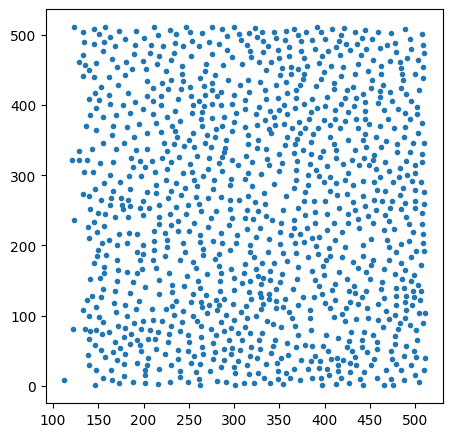

In [10]:
tif_directory = path + '/YFP'
csv_directory = path + '/YFP/imagej_' + scale + '/merged'
output_directory = path + '/YFP/voronoi_color_' + scale
os.makedirs(output_directory, exist_ok=True)
# Iterate through TIF files in the TIF directory
tif_files = [filename for filename in os.listdir(tif_directory) if filename.endswith('.tif')]

for tif_filename in tqdm(tif_files):
    tif_path = os.path.join(tif_directory, tif_filename)
    csv_filename = tif_filename.replace('.tif', '.csv')
    csv_path = os.path.join(csv_directory, csv_filename)

    if os.path.exists(csv_path):
        # Load the input grayscale TIF image
        input_image = imread(tif_path)
        image_shape = input_image.shape

        # Load CSV file using pandas and extract required columns
        coordinates_df = pd.read_csv(csv_path)

        x = coordinates_df['XM'].values
        y = coordinates_df['YM'].values
        fret_values = coordinates_df['FRET'].values
                
        normalized_fret = (fret_values - fret_min) / (fret_max - fret_min)
        
        # Create a list of points with the shifted coordinates
        points = np.column_stack((x, y))

        # Create a Voronoi object
        vor = Voronoi(points)
        voronoi_colors = cmap(normalized_fret)

        # Convert RGB colors to 8-bit range (0-255)
        voronoi_colors_rgb = (voronoi_colors[:, :3] * 255).astype(np.uint8)

        # Create a black background RGB image based on input image dimensions
        rgb_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

        # Plot the Voronoi diagram on the RGB image with rainbow coloring
        fig, ax = plt.subplots(figsize=(image_shape[1]/100, image_shape[0]/100), dpi=100)
        voronoi_plot_2d(vor, show_vertices=False, ax=ax, line_colors=voronoi_colors_rgb, line_width=1)
        ax.set_xlim([0, image_shape[1]])
        ax.set_ylim([0, image_shape[0]])



        # Convert the plot to an RGB image with the same dimensions
        plt.tight_layout()
        plt.subplots_adjust(0, 0, 1, 1)
        fig.canvas.draw()

        # Convert the plot to an RGB image and save it as a TIFF file
        plt_image = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :-1]
        output_image_path = os.path.join(output_directory, f'frame_{tif_filename}')
        # Convert the plot to an RGB image and scale it to uint16
      
        imsave(output_image_path, rgb_image)
        # Close the plot
        plt.close()





In [ ]:
voronoi_colors = cmap(normalized_fret)

# Convert RGB colors to 8-bit range (0-255)
voronoi_colors_rgb = (voronoi_colors[:, :3] * 255).astype(np.uint8)

# Create a black background RGB image based on input image dimensions
rgb_image = np.zeros((image_shape[0], image_shape[1], 3), dtype=np.uint8)

# Plot the Voronoi diagram on the RGB image with rainbow coloring
fig, ax = plt.subplots(figsize=(image_shape[1]/100, image_shape[0]/100), dpi=100)
voronoi_plot_2d(vor, show_vertices=False, ax=ax, line_colors=voronoi_colors_rgb, line_width=1)
ax.set_xlim([0, image_shape[1]])
ax.set_ylim([0, image_shape[0]])

# Convert the plot to an RGB image with the same dimensions
plt.tight_layout()
plt.subplots_adjust(0, 0, 1, 1)
fig.canvas.draw()

# Convert the plot to an RGB image and save it as a TIFF file
plt_image = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :-1]
output_image_path = os.path.join(output_directory, f'frame_{tif_filename}')
io.imsave(output_image_path, plt_image)

# Close the plot
plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import img_as_ubyte, io, color

# ...

# Create a list of points with the shifted coordinates
points = np.column_stack((x, y))

# Create a Voronoi object
vor = Voronoi(points)

# Normalize 'fret' values to the range [0, 1]
normalized_fret = (fret_values - fret_min) / (fret_max - fret_min)

# Map normalized 'fret' values to a rainbow colormap
cmap = plt.get_cmap('rainbow')
voronoi_colors = cmap(normalized_fret)

# Convert RGB colors to RGBA colors with alpha = 1
voronoi_colors_rgba = np.hstack((voronoi_colors, np.ones((len(voronoi_colors), 1))))

# Create a black background RGB image based on input image dimensions
rgb_image = np.zeros((image_shape[0], image_shape[1], 4), dtype=np.float32)

# Plot the Voronoi diagram on the RGB image with rainbow coloring
fig, ax = plt.subplots(figsize=(image_shape[1]/100, image_shape[0]/100), dpi=100)
voronoi_plot_2d(vor, show_vertices=False, ax=ax, line_colors=voronoi_colors_rgba, line_width=1)
ax.set_xlim([0, image_shape[1]])
ax.set_ylim([0, image_shape[0]])

# Convert the plot to an RGB image with the same dimensions
plt.tight_layout()
plt.subplots_adjust(0, 0, 1, 1)
fig.canvas.draw()

# Convert the plot to an RGB image and scale it to uint16
plt_image = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :-1]

# Convert to 16-bit range
rgb_image = img_as_ubyte(plt_image)

# Save the RGB image as a TIFF file
output_image_path = os.path.join(output_directory, f'frame_{tif_filename}')
io.imsave(output_image_path, rgb_image)

# Close the plot
plt.close()


In [5]:
# Set the directory path where your TIFF images are located
input_path = output_directory

# Set the directory path where you want to save PNG images
output_path = input_path + "/png"
os.makedirs(output_path, exist_ok=True)
# Get a list of all TIFF files in the input directory
tiff_files = [f for f in os.listdir(input_path) if f.lower().endswith('.tif')]

# Loop through the TIFF files and convert each to PNG
for tiff_file in tqdm(tiff_files):
    tiff_path = os.path.join(input_path, tiff_file)
    img = Image.open(tiff_path)
    
    # Extract the image name (without extension) for PNG file naming
    image_name = os.path.splitext(tiff_file)[0]
    
    # Save the image as PNG
    png_path = os.path.join(output_path, image_name + ".png")
    img.save(png_path, format="PNG")    
    img.close()


100%|██████████| 224/224 [00:08<00:00, 26.48it/s]
